## Data Descriptions

### Kidney Disease Dataset

Predicting Chronic Kidney Disease based on health records.

Given 24 health related attributes taken in 2-month period of 400 patients, using the information of the 158 patients with complete records to predict the outcome (i.e. whether one has chronic kidney disease) of the remaining 242 patients (with missing values in their records).

**Problem Statement :** Classify whether the patients have "Classification" column 'ckd' or 'notckd'. This means whether the patient has kidney disorder or not.

In [1]:
# Importing the dataset and libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

%matplotlib inline

In [3]:
kidney_df = pd.read_csv('kidney_disease.csv')

In [4]:
kidney_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


** There are 26 columns **

In [5]:
kidney_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
id                400 non-null int64
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
rbc               248 non-null object
pc                335 non-null object
pcc               396 non-null object
ba                396 non-null object
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               330 non-null object
wc                295 non-null object
rc                270 non-null object
htn               398 non-null object
dm                398 non-null object
cad               398 non-null object
appet             399 non-null object
pe         

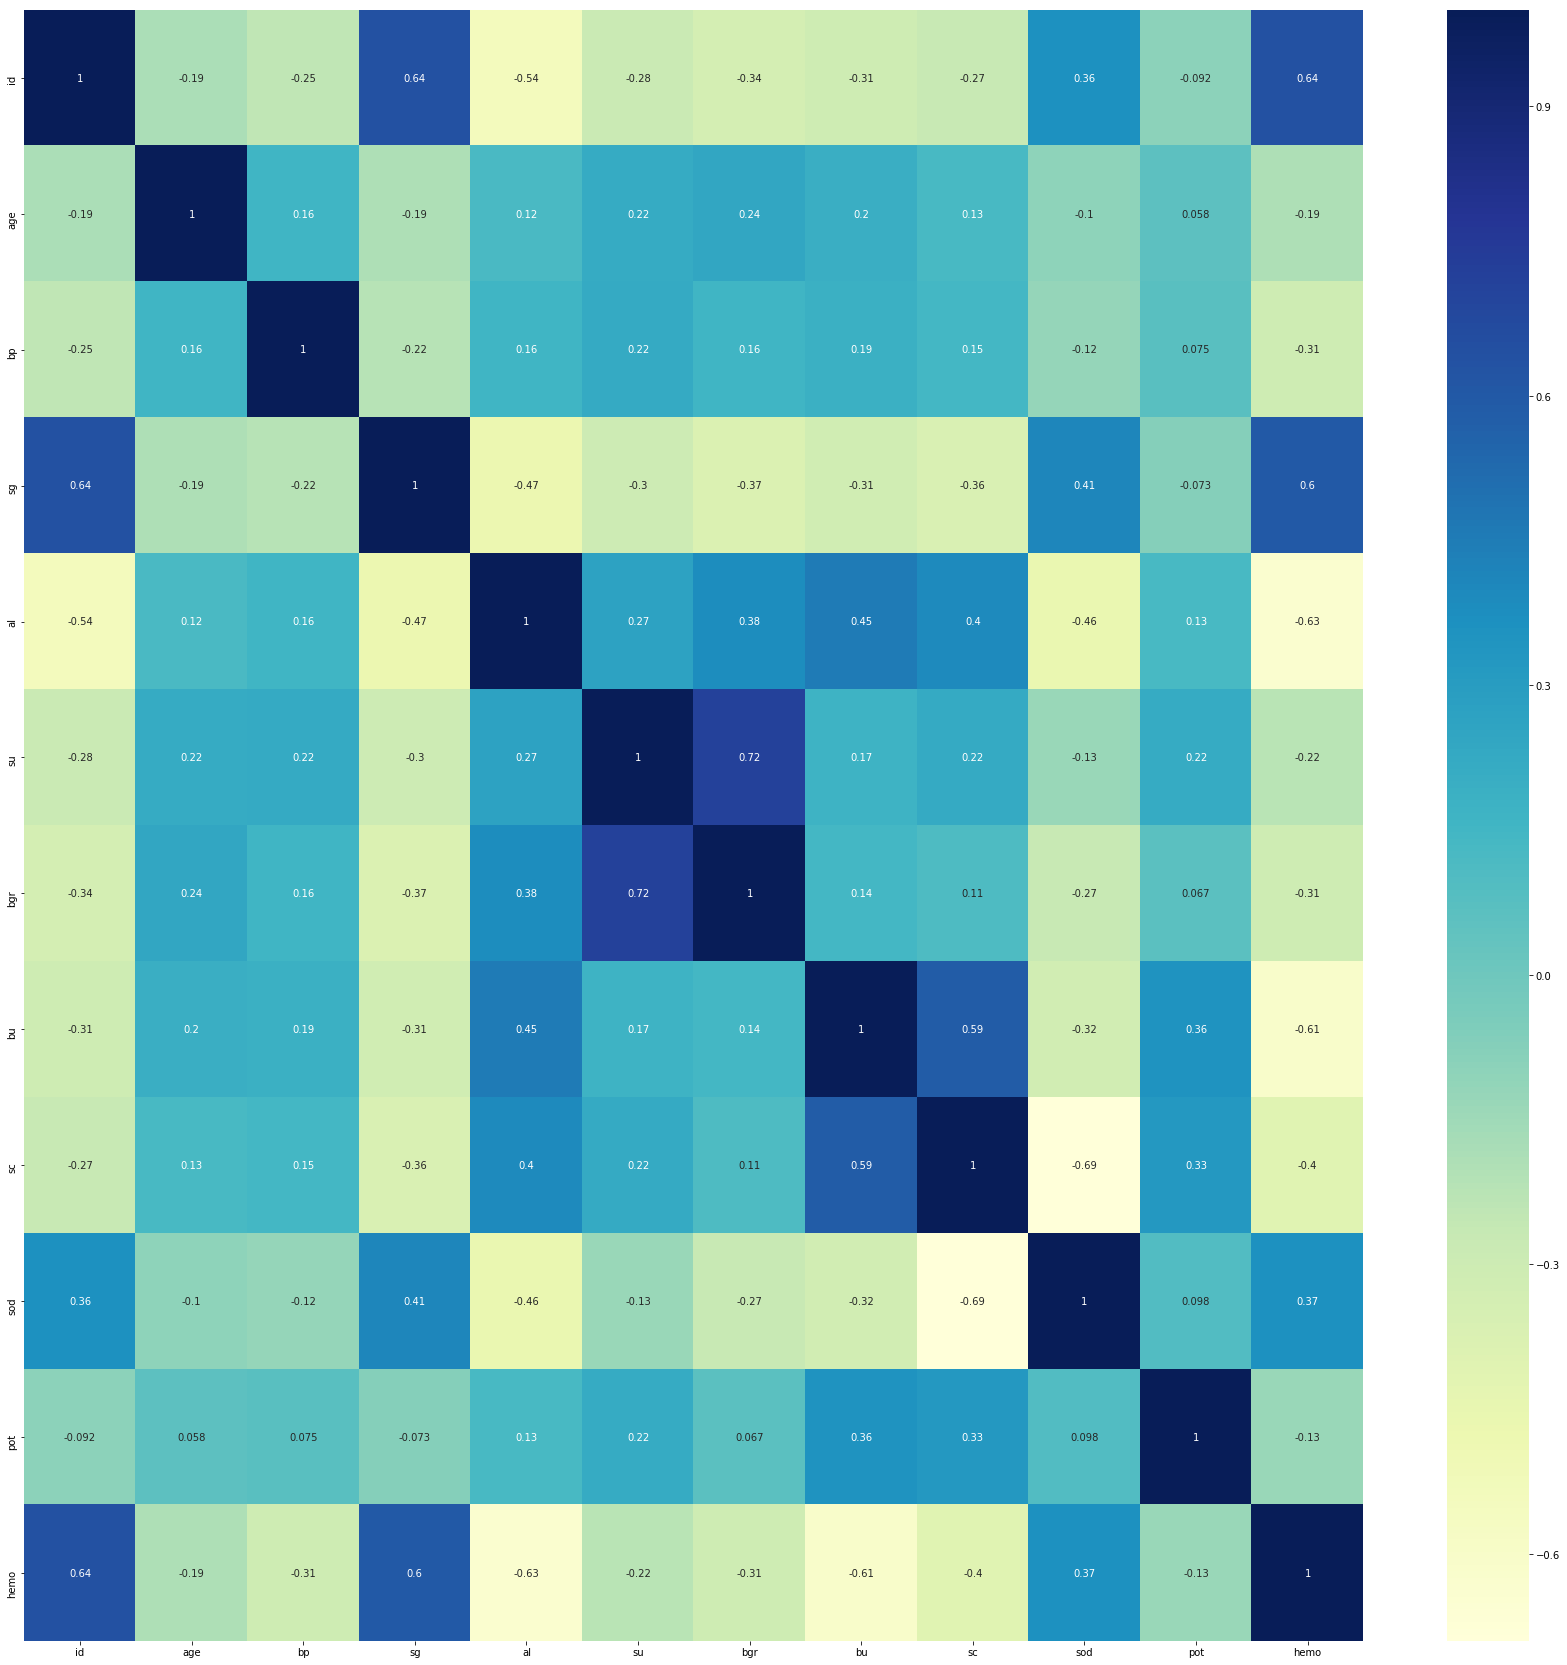

In [6]:
corr = kidney_df.corr()
plt.subplots(figsize=(30,30))
sns.heatmap(corr, cmap='YlGnBu', annot=True)
plt.show()

## Perform feature engineering on the columns to remove all the categorical columns and object datatype columns

In [7]:
kidney_df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

** There are a lot of object data types. We need to convert them to numeric before any further processing **

** These columns have numerical values but have object dtype **

In [8]:
#These columns have \t? values

kidney_df.drop(kidney_df.index[[66,214,185, 133, 162]], inplace=True)

In [9]:
kidney_df[['pcv','wc','rc']] = kidney_df[['pcv','wc','rc']].apply(pd.to_numeric)

** These columns are categorical **

In [10]:
kidney_df[['htn','dm','cad','pe','ane']] = kidney_df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
kidney_df['dm'] = kidney_df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
kidney_df['cad'] = kidney_df['cad'].replace(to_replace='\tno',value=0)

kidney_df[['rbc','pc']] = kidney_df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
kidney_df[['pcc','ba']] = kidney_df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})

kidney_df[['appet']] = kidney_df[['appet']].replace(to_replace={'good':1,'poor':0})  #,'no':np.nan
kidney_df['classification'] = kidney_df['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0})  #,'no':0.0
kidney_df.rename(columns={'classification':'class'},inplace=True)

In [11]:
kidney_df['pe'] = kidney_df['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
kidney_df['appet'] = kidney_df['appet'].replace(to_replace='no',value=0)

# Dropping the index column
kidney_df.drop('id',axis=1,inplace=True)

In [12]:
kidney_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 399
Data columns (total 25 columns):
age      386 non-null float64
bp       384 non-null float64
sg       349 non-null float64
al       350 non-null float64
su       347 non-null float64
rbc      246 non-null float64
pc       331 non-null float64
pcc      391 non-null float64
ba       391 non-null float64
bgr      351 non-null float64
bu       376 non-null float64
sc       378 non-null float64
sod      309 non-null float64
pot      308 non-null float64
hemo     344 non-null float64
pcv      325 non-null float64
wc       291 non-null float64
rc       267 non-null float64
htn      393 non-null float64
dm       393 non-null object
cad      393 non-null float64
appet    394 non-null float64
pe       394 non-null float64
ane      394 non-null float64
class    395 non-null float64
dtypes: float64(24), object(1)
memory usage: 80.2+ KB


** Now we have converted all the object columns in float64 **

##  Removing missing values from the data frame

In [13]:
kidney_df.isnull().sum()


age        9
bp        11
sg        46
al        45
su        48
rbc      149
pc        64
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       86
pot       87
hemo      51
pcv       70
wc       104
rc       128
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

Columns such as rbc, wc and rc have high missing values. Hence we will drop them from the df and fill the rest with the column mean value

In [14]:
 kidney_df.drop(['rbc', 'wc', 'rc'], axis=1, inplace=True)

In [15]:
kidney_df = kidney_df.fillna(kidney_df.mean())

In [16]:
kidney_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 399
Data columns (total 22 columns):
age      395 non-null float64
bp       395 non-null float64
sg       395 non-null float64
al       395 non-null float64
su       395 non-null float64
pc       395 non-null float64
pcc      395 non-null float64
ba       395 non-null float64
bgr      395 non-null float64
bu       395 non-null float64
sc       395 non-null float64
sod      395 non-null float64
pot      395 non-null float64
hemo     395 non-null float64
pcv      395 non-null float64
htn      395 non-null float64
dm       395 non-null float64
cad      395 non-null float64
appet    395 non-null float64
pe       395 non-null float64
ane      395 non-null float64
class    395 non-null float64
dtypes: float64(22)
memory usage: 71.0 KB


In [17]:
kidney_df.head()

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,...,pot,hemo,pcv,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,121.000000,36.0,...,4.628247,15.4,44.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,148.031339,18.0,...,4.628247,11.3,38.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,423.000000,53.0,...,4.628247,9.6,31.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,1.0,1.0,0.0,117.000000,56.0,...,2.500000,11.2,32.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,106.000000,26.0,...,4.628247,11.6,35.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [18]:
kidney_df.tail()

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,...,pot,hemo,pcv,htn,dm,cad,appet,pe,ane,class
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,140.0,49.0,...,4.9,15.7,47.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,75.0,31.0,...,3.5,16.5,54.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,100.0,26.0,...,4.4,15.8,49.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,114.0,50.0,...,4.9,14.2,51.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
399,58.0,80.0,1.025,0.0,0.0,0.0,0.0,0.0,131.0,18.0,...,3.5,15.8,53.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Descriptive stats

In [19]:
kidney_df.describe()

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,...,pot,hemo,pcv,htn,dm,cad,appet,pe,ane,class
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,51.455959,76.432292,1.017407,1.008571,0.455331,0.226586,0.107417,0.056266,148.031339,57.479255,...,4.628247,12.534012,38.898462,0.368957,0.340967,0.086514,0.791878,0.190355,0.152284,0.620253
std,16.845351,13.500540,0.005397,1.269492,1.034994,0.383697,0.308461,0.229556,75.138023,49.416675,...,2.837424,2.728991,8.195215,0.481909,0.473432,0.280765,0.405964,0.392581,0.359296,0.485939
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,1.500000,...,2.500000,3.100000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,0.000000,0.000000,0.000000,101.000000,27.000000,...,4.000000,10.850000,34.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,54.000000,80.000000,1.017407,0.000000,0.000000,0.000000,0.000000,0.000000,125.000000,44.000000,...,4.628247,12.534012,38.898462,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.000000,80.000000,1.020000,2.000000,0.455331,0.226586,0.000000,0.000000,149.015670,62.500000,...,4.800000,14.700000,44.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,490.000000,391.000000,...,47.000000,17.800000,54.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


std is high for al, su, rbc, pc, pcc, ba, bgr etc  . These fields do not have a normal distribution.

##  EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BAA9358>,
      dtype=object)

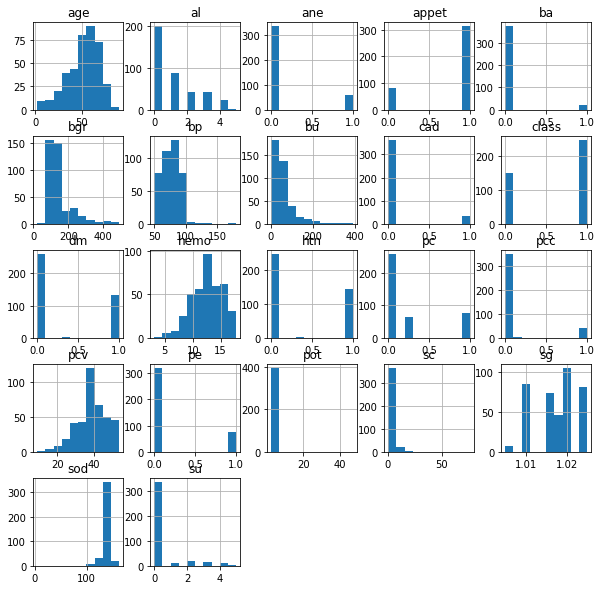

In [20]:
kidney_df.hist(bins=10, figsize=(10,10))

We have asymmetric distribution of the data in the plots. We can clearly see the data are not continuous in nature.

#### Pair plotting randomly chosen columns like the age, bp, sugar(sg), hemoglobin(hemo)

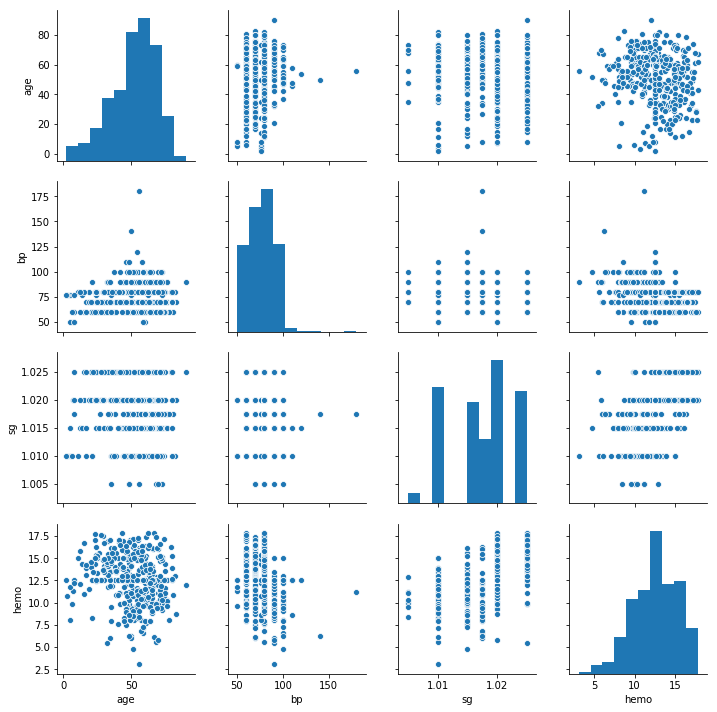

In [21]:
sns.pairplot(kidney_df, vars=["age","bp","sg","hemo"])

People whose age is around 50 have bp value less than 100 and hemo values lingering between 10-17.5. People having bp below 100 have hemo values ranging somewhere between 7.5 - 17.5 units. 

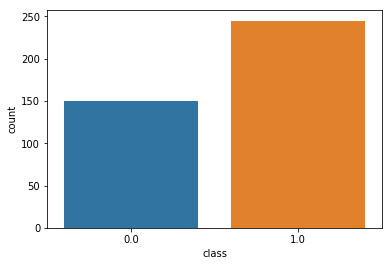

In [22]:
sns.countplot(x='class', data=kidney_df)

We can see that 150 people in the sample do not have kidney disorder and where as the remaining 245 people have a kidney disorder because of unhealthy lifestyle.

##  Classification using Decision Tree algorithm and explaining the performance

### Seperating features and label

In [23]:
x = kidney_df.drop('class', axis=1)
y = kidney_df['class']

x.columns


Index(['age', 'bp', 'sg', 'al', 'su', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc',
       'sod', 'pot', 'hemo', 'pcv', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'],
      dtype='object')

### Creating the instance of the Decision Tree

In [24]:
from sklearn import tree

In [25]:
decision_tree = tree.DecisionTreeClassifier(max_depth=3, min_samples_split=5, random_state=8)

### Train the model using X and Y 

In [26]:
decision_tree = decision_tree.fit(x,y)

In [27]:
list(zip(x.columns, decision_tree.feature_importances_))

[('age', 0.0),
 ('bp', 0.0),
 ('sg', 0.16402295396825317),
 ('al', 0.0),
 ('su', 0.0),
 ('pc', 0.0),
 ('pcc', 0.0),
 ('ba', 0.0),
 ('bgr', 0.0),
 ('bu', 0.008228184209079283),
 ('sc', 0.0),
 ('sod', 0.0),
 ('pot', 0.0),
 ('hemo', 0.7523641354056221),
 ('pcv', 0.04233379326449377),
 ('htn', 0.03305093315255168),
 ('dm', 0.0),
 ('cad', 0.0),
 ('appet', 0.0),
 ('pe', 0.0),
 ('ane', 0.0)]

Clearly visible that the columns such has hemo (hemoglobin level) and sg(sugar levels) have major impact in predicting kidney disorder of the patient.
Other columns have very neligible or no impact in the prediction of the kidney problem.

###  We will be using the graphviz for the tree visualization

In [28]:
import graphviz

with open('someTree.dot', 'w') as dotfile:
    tree.export_graphviz(decision_tree, out_file=dotfile, feature_names=x.columns, filled=True)
    dotfile.close()

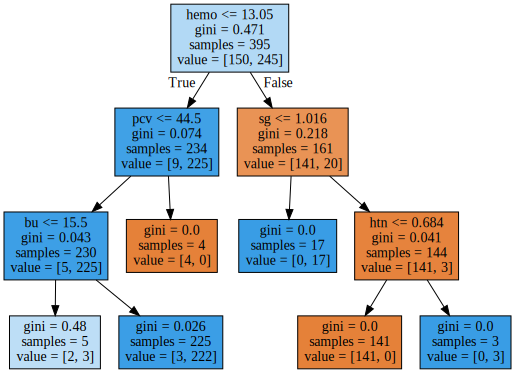

In [29]:
from graphviz import Source
with open('someTree.dot', 'r') as file:
    text_contents = file.read()
    plot_graph = Source(text_contents)
    
plot_graph    

Conclusions from the tree map :
So we can make some conclusions like people with hemo value less than 13.05 and pcv value(packed cell volume) less than 44.5 and bu value greater than 15.5 have the highest chance of a kidney disorder.
Also people with hemo > 13.05, sg > 1.016 and htn < 0.684 have the highest chance of not having any kidney disorder.

### Predict the output using the model 

In [30]:
prediction = decision_tree.predict(x)

### Evaluate the model using some metrics

In [31]:
print(decision_tree.score(x,y))

0.9873417721518988


In [32]:
from sklearn import metrics

conf_matrx = metrics.confusion_matrix(y,prediction)
print(conf_matrx)

[[145   5]
 [  0 245]]


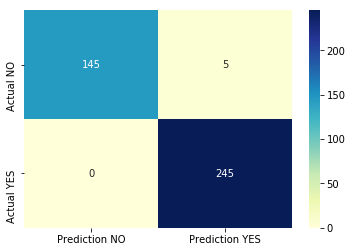

In [33]:
sns.heatmap(conf_matrx, cmap="YlGnBu", xticklabels=['Prediction NO', 'Prediction YES'], yticklabels=['Actual NO', 'Actual YES'], annot=True, fmt='d')

In [34]:
classification_report = metrics.classification_report(y, prediction)
print(classification_report)

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98       150
         1.0       0.98      1.00      0.99       245

   micro avg       0.99      0.99      0.99       395
   macro avg       0.99      0.98      0.99       395
weighted avg       0.99      0.99      0.99       395



*** Since the precison and the recall values of the model are pretty high we can conclude that the model is very accurate in predicting the kidney disorder of the patient